In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df=pd.read_csv('Unemployment in India.csv')

In [5]:
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [7]:
print(df.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [16]:
df.columns=["States","Date","Frequency",
            "Estimated Unemployment Rate","Estimated Employed",

            "Estimated Labour Participation Rate","Region"]


<ipython-input-20-d54012db9560>:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



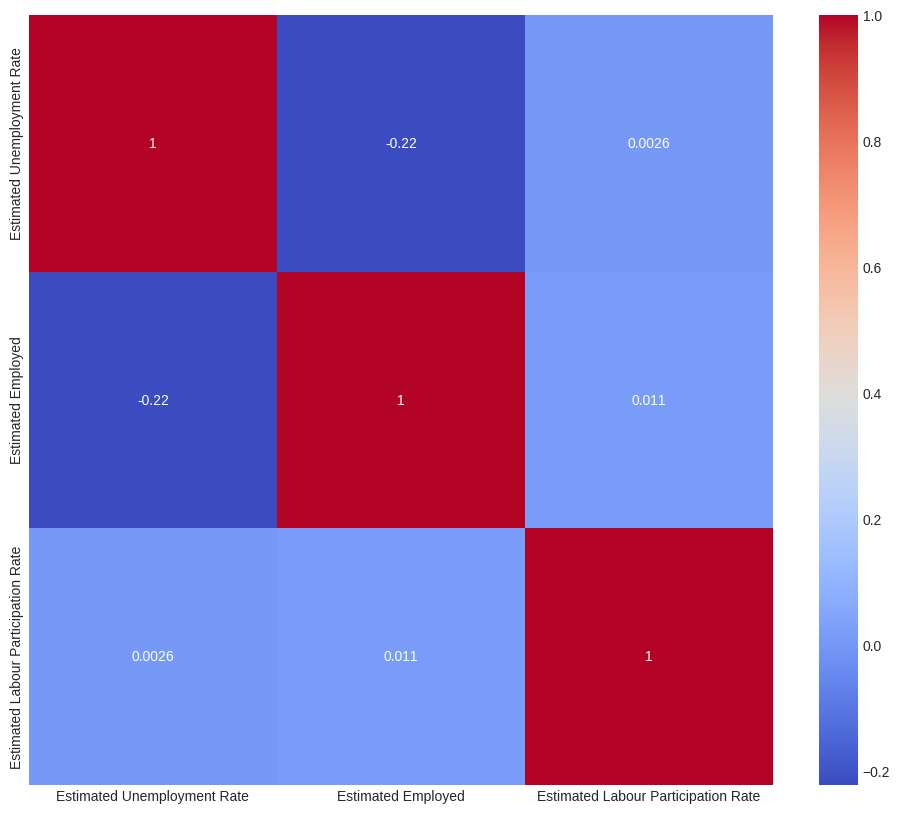

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#select only numerical columns for correlation calculation
numerical_df=df.select_dtypes(include=['number'])

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,10))
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [21]:
#Data visualization


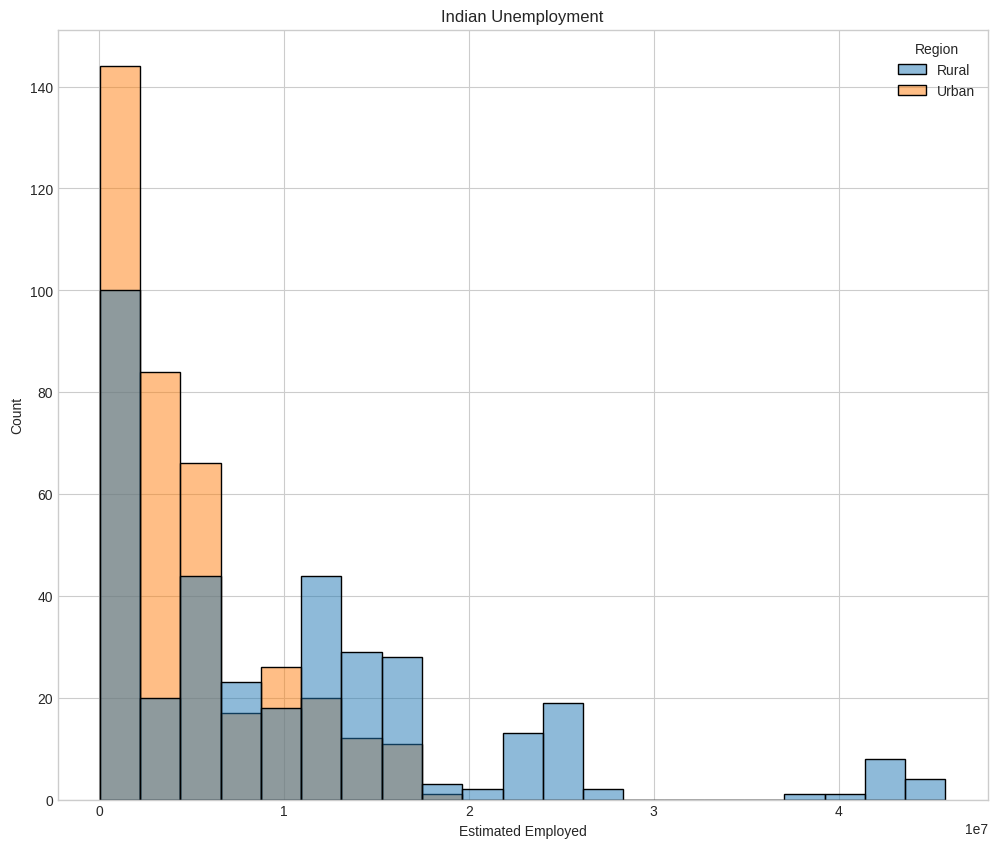

In [27]:
df.columns=["States","Date","Frequency",
            "Estimated Unemployment Rate","Estimated Employed",
            "Estimated Labour Participation Rate","Region",]

df['longitude']=None
df['latitude']=None

plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=df)
plt.show()

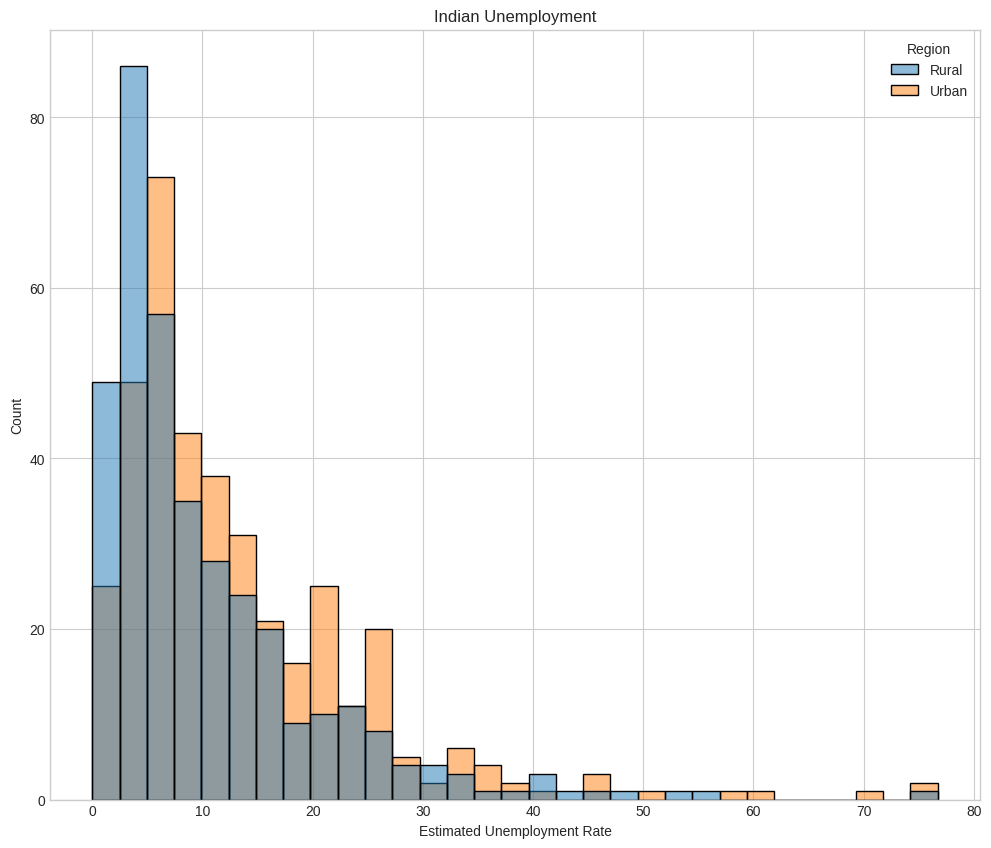

In [28]:
plt.figure(figsize=(12,10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=df)
plt.show()

In [36]:
unemploment=df[["States","Region","Estimated Unemployment Rate"]]

In [42]:
#check for duplicate 'Region' and 'States' combinations
duplicate_rows=unemploment[unemploment.duplicated(subset=["Region","States"], keep=False)]
print(duplicate_rows)



             States Region  Estimated Unemployment Rate
0    Andhra Pradesh  Rural                         3.65
1    Andhra Pradesh  Rural                         3.05
2    Andhra Pradesh  Rural                         3.75
3    Andhra Pradesh  Rural                         3.32
4    Andhra Pradesh  Rural                         5.17
..              ...    ...                          ...
763             NaN    NaN                          NaN
764             NaN    NaN                          NaN
765             NaN    NaN                          NaN
766             NaN    NaN                          NaN
767             NaN    NaN                          NaN

[768 rows x 3 columns]


In [43]:
#remove duplicates
unemploment=unemploment.drop_duplicates(subset=["Region","States"],keep='first')


In [44]:
#aggregate the data for duplicate rows
unemploment=unemploment.groupby(["Region","States"],as_index=False)['Estimated Unemployment Rate'].sum()

In [47]:
figure=px.sunburst(unemploment,path=["Region","States"],
                   values="Estimated Unemployment Rate",
                   width=700, height=700, color_continuous_scale="RdY1Gn",
                   title="Unemployment Rate in India")
figure.show()

In [ ]:

this is how unemploment rate is analysed by using python language.it is measured by the unemployment rate which is the number of people who are unemployed as a percentage of total labour force.